# Data wrangling and visualization with pandas, seaborn, and matplotlib

## Lesson preamble

### Learning Objectives

- Produce scatter plots, line plots, and histograms using `seaborn` and `matplotlib`.
- Understand how to graphically explore relationships between variables.
- Apply grids for faceting in `seaborn`.
- Set universal plot settings.
- Use `seaborn` grids with `matplotlib` functions

### Lesson outline

- Data visualization with `matplotlib` and `seaborn` (10 min)
    - Visualizing one quantitative variable with multiple categorical variables (50 min)
    - Visualizing the relationship of two quantitative variable with multiple categorical variables (40min)
    - Using any plotting function with `seaborn` grids (20 min)

In [1]:
# Setup by importing the same data as in previous lecture
import pandas as pd

surveys = pd.read_csv('surveys.csv')
surveys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34786 entries, 0 to 34785
Data columns (total 13 columns):
record_id          34786 non-null int64
month              34786 non-null int64
day                34786 non-null int64
year               34786 non-null int64
plot_id            34786 non-null int64
species_id         34786 non-null object
sex                33038 non-null object
hindfoot_length    31438 non-null float64
weight             32283 non-null float64
genus              34786 non-null object
species            34786 non-null object
taxa               34786 non-null object
plot_type          34786 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 3.5+ MB


In [2]:
surveys.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,genus,species,taxa,plot_type
0,1,7,16,1977,2,NL,M,32.0,NaN,Neotoma,albigula,Rodent,Control
1,72,8,19,1977,2,NL,M,31.0,NaN,Neotoma,albigula,Rodent,Control
2,224,9,13,1977,2,NL,NaN,NaN,NaN,Neotoma,albigula,Rodent,Control
3,266,10,16,1977,2,NL,NaN,NaN,NaN,Neotoma,albigula,Rodent,Control
4,349,11,12,1977,2,NL,NaN,NaN,NaN,Neotoma,albigula,Rodent,Control


## Data visualization in `matplotlib` and `seaborn`

There are many plotting packages in Python, making it possible to create diverse visualizations such as interactive web graphics, 3D animations, statistical visualization, and map-based plots. Here, we will focus on two of the most useful for researchers, `matplotlib` which is a robust, detail-oriented, low level plotting interface, and `seaborn` which provides high level functions on top of `matplotlib` and allows the plotting calls to be expressed more in terms what is being explored in the underlying data rather than what graphical elements to add to the plot.

Instead of instructing the computer to "go through a data frame and plot any observations of speciesX in blue, any observations of speciesY in red, etc", the `seaborn` syntax is more similar to saying "color the data by species". Thanks to this functional way of interfaces with data, only minimal changes are required if the underlying data change or to switch the type of plot used for the visualization. It provides a language that facilitates thinking about data in ways that are conducive for exploratory analysis and allows for the and creation of publication quality plots with minimal amounts of adjustments and tweaking.

The concepts of plotting with `seaborn` were introduced briefly already in the first lecture. To make a plot of the number of observations for each species, first import the library and then use the `countplot()` function. Before the first plot is created, the line `%matplotlib inline` is used to specify that all plots should show up in the notebook instead of in a separate window.

In [3]:
%matplotlib inline

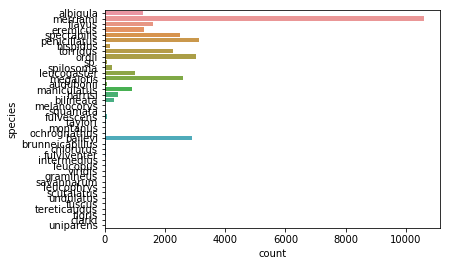

In [4]:
import seaborn as sns

sns.countplot(y='species', data=surveys)

That's a lot of species... for convenience when introducing the following the plotting concept, the number of species will be limited to the four most abundant. To do this, the `value_counts()` method can be used to find out how observations belong to each species.

In [5]:
surveys['species'].value_counts()

merriami           10596
penicillatus        3123
ordii               3027
baileyi             2891
megalotis           2609
spectabilis         2504
torridus            2249
flavus              1597
eremicus            1299
albigula            1252
leucogaster         1006
maniculatus          899
harrisi              437
bilineata            303
spilosoma            248
hispidus             179
sp.                   86
audubonii             75
fulvescens            75
brunneicapillus       50
taylori               46
ochrognathus          43
fulviventer           43
chlorurus             39
leucopus              36
squamata              16
melanocorys           13
intermedius            9
gramineus              8
montanus               8
undulatus              5
fuscus                 5
leucophrys             2
savannarum             2
viridis                1
tereticaudus           1
scutalatus             1
clarki                 1
tigris                 1
uniparens              1


The top four species names could be manually typed in to filter the surveys data frame.

In [6]:
surveys.loc[(surveys['species'] == 'merriami') |
            (surveys['species'] == 'penicillatus') |
            (surveys['species'] == 'ordii') |
            (surveys['species'] == 'baileyi')].shape

(19637, 13)

Comparing this number with the number of rows in the original data frame shows that it was filtered successfully.

In [7]:
surveys.shape

(34786, 13)

However, it is rather tedious to type out the species names by hand and to do one comparison per species. Instead, the names of the most abundand species can be extract by using `nlargest()` and returning only the index (row names) of the top observations.

In [8]:
most_common_species = (
    surveys['species']
       .value_counts()
       .nlargest(4)
       .index
)
most_common_species

Index(['merriami', 'penicillatus', 'ordii', 'baileyi'], dtype='object')

A subset can now be created from the data frame, including only those rows where the column 'species' matches any of the names in the `most_common_species` variable. `pandas` has a special `isin()` method for comparing a data frame column to an array-like object of names such as the index extracted above.

In [9]:
surveys.loc[surveys['species'].isin(most_common_species)].shape

(19637, 13)

The number of observations is the same as with the manual filtering above, but this method is more succinct.

To facilitate plotting, any NA values will be dropped before assigning the resulting data frame to a new variable name.

In [10]:
surveys_common = surveys.loc[surveys['species'].isin(most_common_species)].dropna()
surveys_common.shape

(18289, 13)

This abbreviated data frame can now be used for plotting.

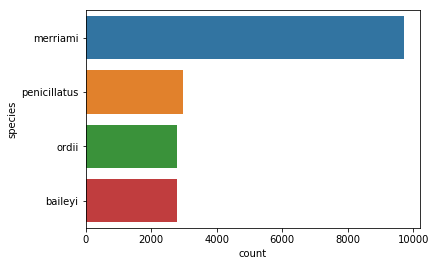

In [11]:
sns.countplot(y='species', data=surveys_common)

That's more manageable! The text is a little small, which can be changed with the `set_context()` function from `seaborn`, using a number above `1` for the fontscale parameter. The context parameter changes the size of object in the plots, such as the line widths, and will be left as the default `notebook` for now.

These option changes will apply to all plots made from now on. Think of it as changing a value in the options menu of a graphical software. 

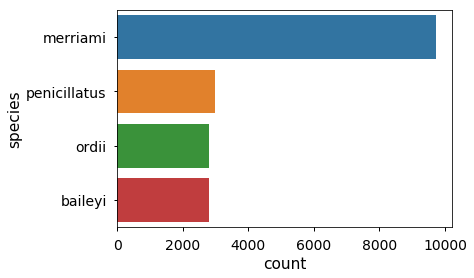

In [12]:
sns.set_context(context='notebook', font_scale=1.4)
sns.countplot(y='species', data=surveys_common)

To get a vertical plot, change `y` to `x`. With long label names, horizontal plots can be easier to read.

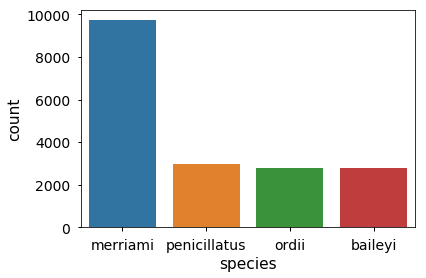

In [13]:
sns.countplot(x='species', data=surveys_common)

### Visualizing one quantitative variable across multiple categorical variables

`seaborn` can do much more advanced visualizations than counting observations. Next, the relationship between one quantitative and one categorical valuable will be explored while stratifying the data based on its remaining categorical variables. To start, let's visualize summary statistics of the weight variable distribution for these fours species with a boxplot.

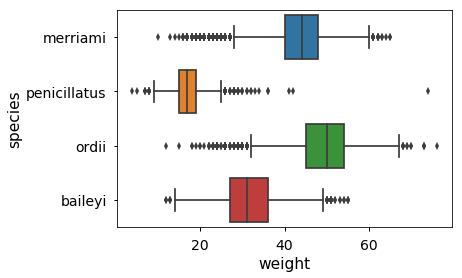

In [14]:
sns.boxplot(x='weight', y='species', data=surveys_common)

The width of each box can be changed to make it look more appealing.

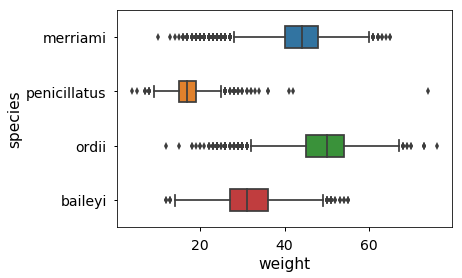

In [15]:
sns.boxplot(x='weight', y='species', data=surveys_common, width=0.4)

The syntax is very similar to that of `countplot()`, but instead of just supplying one variable and asking `seaborn` to count the observations of that variable, the xy-variables are the categorical groups (the species) and the measurement of interest (the weight).

The aim of a box plot is to display a few statistics from the underlying distribution of one quantitative variable between the values of one categorical variable (the y-axis). The inclusion of multiple distribution statistics facilitates the comparison of more than just the mean + standard deviation (or another single measure of central tendency and variation). The `seaborn` box plots are so-called Tukey box plots by default, which means that the graphical elements correspond to the following statistics:

- The lines of the box represent the 25th, 50th (median), and 75th quantile in the data. These divide the data into four quartiles (0-25, 25-50, 50-75, 75-100).
- The whiskers represent 1.5 * the interquartile range (the distance between the 25th and 75th quantile).
- The flyers mark all individual observations that are outside the whiskers, which could be referred to as "outliers" (although there are many definitions of what could constitutes an outlier).

Most of these plot elements are configurable and could be set to represent different distribution statistics.

Another useful visualization for comparing distributions is the `violinplot`. Again, the syntax is the same as before, just change the plot name.

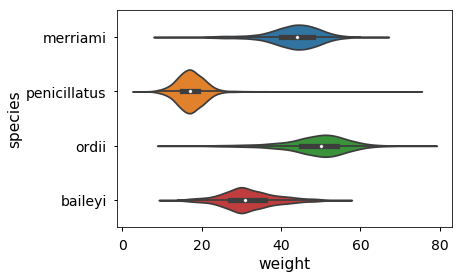

In [16]:
sns.violinplot (x='weight', y='species', data=surveys_common)

Think of this plot as a smoothened version of the underlying histogram, that is then mirrored to give the violin-like shape. Where the violin is wider, there are more observations. The inner part is a boxplot with the median marked as a white dot. Comparisons with histograms and other distribution visualizations will be talked more about later in the workshop, but it is good to already keep in mind that although violinplots are great medium to large data sets, it can be misleading to use a smoothened distribution when there are very few observations, and it is probably better to show the individual data points instead of, or in addition to, the distribution plot.

The colors of the violins can be changed with the `palette` keyword.

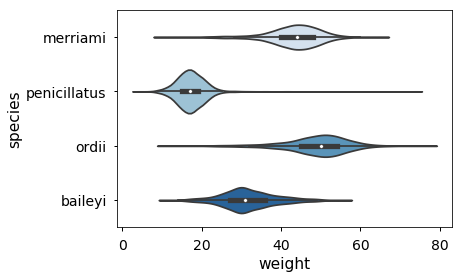

In [17]:
sns.violinplot (x='weight', y='species', data=surveys_common, palette='Blues')

The `color` parameter can be used to set all violins in the same color.

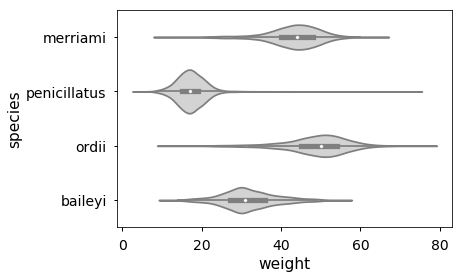

In [18]:
sns.violinplot (x='weight', y='species', data=surveys_common, color='lightgrey')

An example for when a violin plot can be more informative than a box plot is to detect multimodal distributions, which could indicate that multiple values from an underlying confounding variable has been grouped together. This can be observed when comparing the weight of all animals in each type of trap used to catch them (the `plot_type` column).

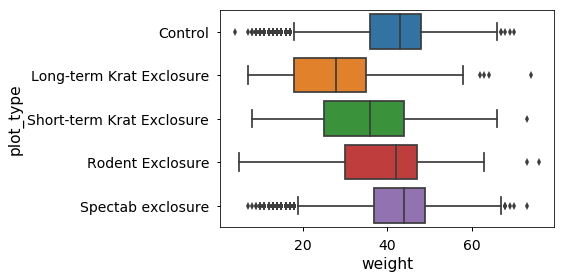

In [19]:
sns.boxplot(x='weight', y='plot_type', data=surveys_common)

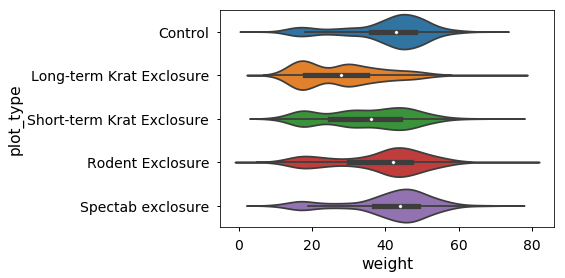

In [20]:
sns.violinplot(x='weight', y='plot_type', data=surveys_common)

From the violin plot, it appears that there could be multiple distributions grouped together within each type of trap. There seems to be one distribution centered around 20 grams for all traps and one distribution centered around 45 grams (or 30 grams for Long-term krat exclosure). These observations could indeed be from the same distribution, but often when there are multiple bumps like this, it is a good idea to explore other variables in the data set, and see if there is a confounding variable contributing to the multimodality of the violin plot.

Since there appears to be 2-3 bumps in the distributions, it would be good to find a categorical variable in the data frame that has around the same number of unique values. The `pandas` method `nunique()` can count the number of unique values within each variable.

In [21]:
surveys_common.nunique().sort_values()

taxa                   1
sex                    2
genus                  2
species_id             4
species                4
plot_type              5
month                 12
plot_id               24
year                  26
day                   31
hindfoot_length       40
weight                69
record_id          18289
dtype: int64

There are a few candidate variables that have a suitable number of unique values. A very effective approach for exploring multiple categorical variables in a data set, is to plot so-called small multiples of the data where the same type of plot is used for different subsets of the data. These plots are drawn in rows and columns forming a grid pattern, and can be referred to as a "lattice", "facet", or "trellis" plot.

Visualizing categorical variables in this manner is a key step in exploratory data analysis, and thus `seaborn` has a dedicated plot function for this, called `factorplot()` (categorical variables are sometimes referred to as "factors"). This plot can be used to plot the same violin plot as before, and easily spread the variables across the rows and columns, e.g. for the variable `sex`.

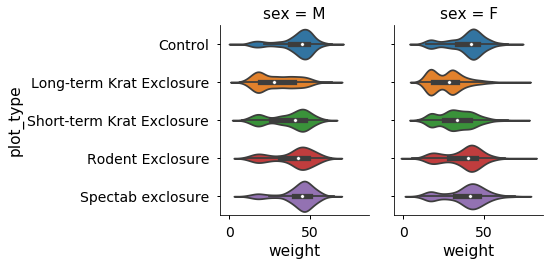

In [22]:
sns.factorplot(x='weight', y='plot_type', data=surveys_common, col='sex',
               kind='violin')

Sorting by the sex of the animal is probably not the most clever approach here since, the same sex from different species might very well have different weights. Let's try faceting the `genus` variable on separate rows.

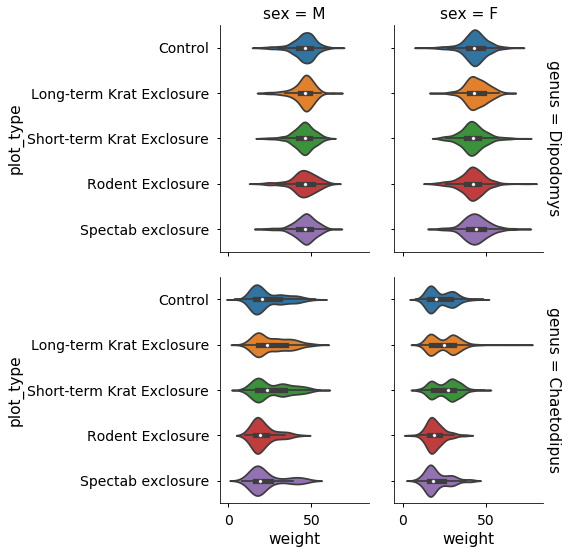

In [23]:
sns.factorplot(x='weight', y='plot_type', data=surveys_common, col='sex',
               row='genus', kind='violin', margin_titles=True)

There are certainly differences in weight between the two genera, but it appears that the data still is not split into unimodal distributions. A likely explanation could be that there are multiple species within each genus and the weight is species-dependent. Let's check how many species there are per genus and how many observations there are in each.

In [24]:
surveys_common.groupby(['genus', 'species']).size()

genus        species     
Chaetodipus  baileyi         2803
             penicillatus    2969
Dipodomys    merriami        9727
             ordii           2790
dtype: int64

There are two species within each genus. If the mean weights for those species are different, it could indeed explain the additional bump in the Chaetodipus distributions above.

In [25]:
surveys_common.groupby(['genus', 'species'])['weight'].mean()

genus        species     
Chaetodipus  baileyi         31.739922
             penicillatus    17.187942
Dipodomys    merriami        43.136013
             ordii           48.867384
Name: weight, dtype: float64

A factor plot with the column variable set to `'species'` instead of `'genus'` might be able to separate the distributions.

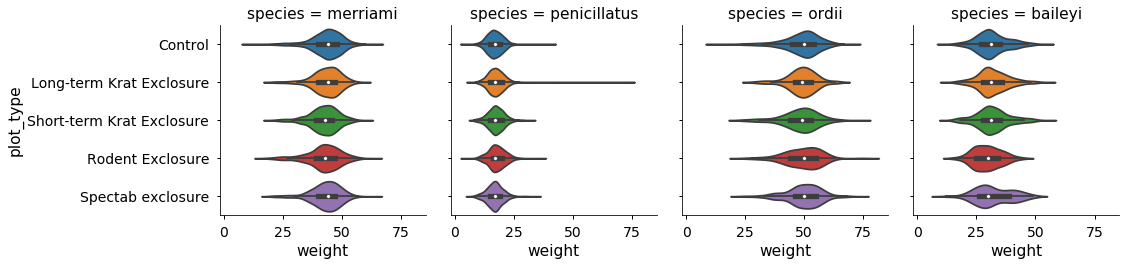

In [26]:
sns.factorplot(x='weight', y='plot_type', data=surveys_common,
               col='species', kind='violin')

That looks pretty good! The plot can be made more appealing by having two columns per row and making each plot a bit wider.

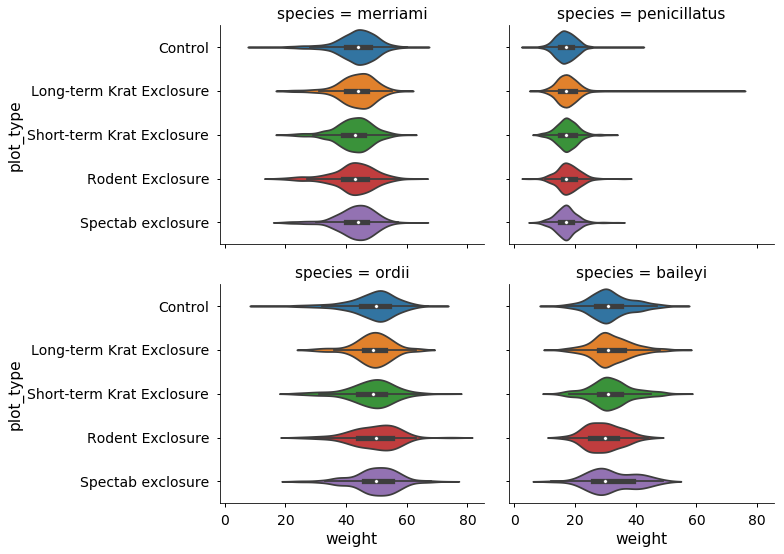

In [27]:
sns.factorplot(x='weight', y='plot_type', data=surveys_common, col='species', 
               col_wrap=2, kind='violin', aspect=1.4)

This is great, much of the variation in the weight data can be explained by the species observed. The only species where there still appears to be multimodal distributions (and thus *possibly* a confounding variable, is within "baileyi" (and potentially "ordii"), especially for the "Spectab exclosure". The "sex" variable was used in a previous plot, but it was never explored within tin each species. It is common with sexual dimorphism within a species, and this could include weight differences.

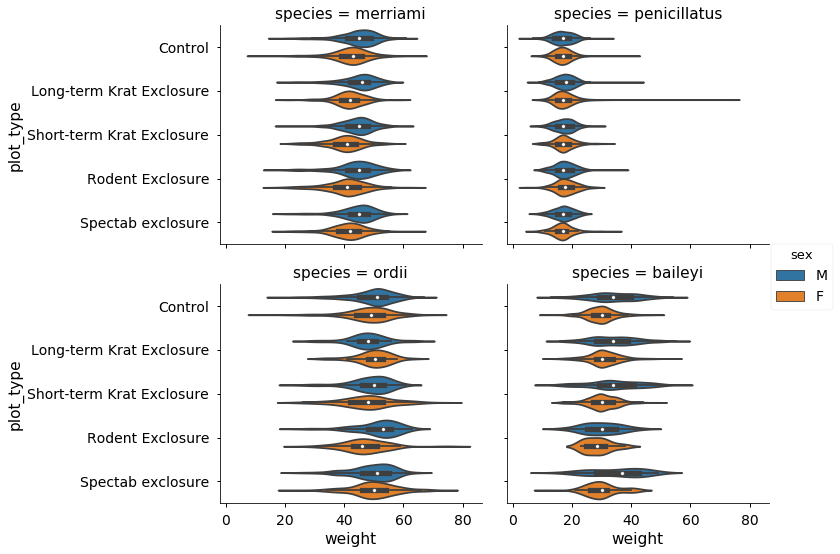

In [28]:
sns.factorplot(x='weight', y='plot_type', hue='sex', data=surveys_common,
               col='species', col_wrap=2, kind='violin', aspect=1.4) 

It does indeed appear that there is a difference in mean and distribution between the sexes within the species "baileyi". Minor differences between the sexes within other species are also visible now although they were not big enough to show up in the initial violinplot. As a final beautification of this plot, the violins can be split down the middle to reduce clutter.

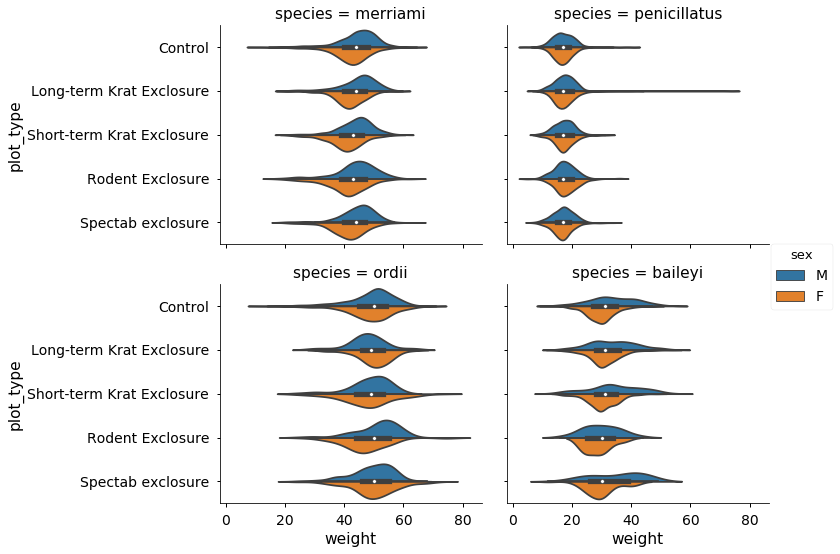

In [29]:
sns.factorplot(x='weight', y='plot_type', hue='sex', data=surveys_common, 
               col='species', col_wrap=2, kind='violin', aspect=1.4, split=True)

This clearly delivers the message and looks is easy to understand. A great aspect of the `factorplot()` function, is that if there is a change of minds (or hearts) in what type of visualization to use, only minor modifications are needed to completely change the plot appearance. For example, plotting the mean and 95% CI, requires changing a couple of parameters to make the plot look good, but the code is largely identical.

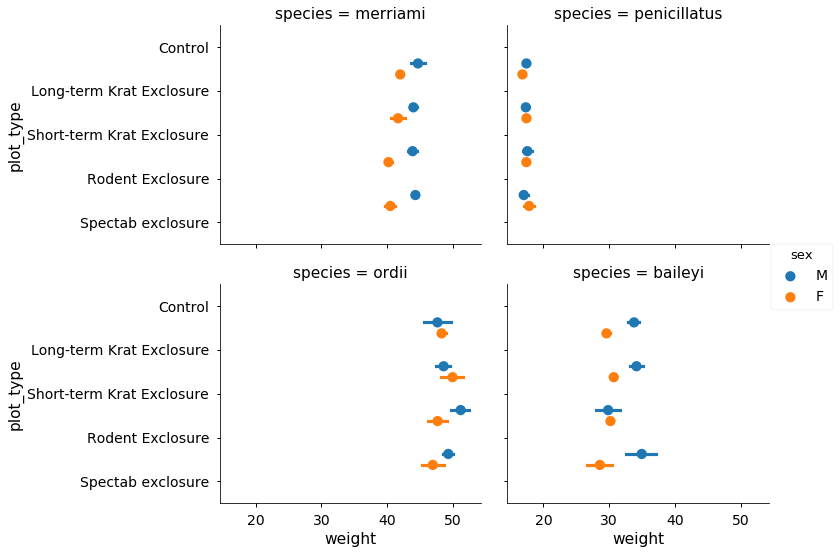

In [58]:
sns.factorplot(x='weight', y='plot_type', hue='sex', data=surveys_common, 
               col='species', col_wrap=2, kind='point', aspect=1.4, join=False,
               dodge=1.25)

To recap, `factorplot()` facilitates the representation of variables within data as different elements in the plot, such as the rows, column, x-axis positions, and colors. There is a great description on this in the `seaborn` documentation:

> It is important to choose how variables get mapped to the plot structure such that the most important comparisons are easiest to make. As a general rule, it is easier to compare positions that are closer together, so the ``hue`` variable should be used for the most important comparisons. For secondary comparisons, try to share the quantitative axis (so, use ``col`` for vertical plots and ``row`` for horizontal plots). Note that, although it is possible to make rather complex plots using this function, in many cases you may be better served by created several smaller and more focused plots than by trying to stuff many comparisons into one figure

We talk more about the advantages and drawbacks of creating complex visualization with `factorplot()` in the second part of the challenge.

>#### Challenge 1
>
>1. Explore the same relationship as in the last violin plot, but visualize the results using a boxplot instead of a violinplot. Which variable(s) did you need to change and why?
>2. Create a grid of countplots comparing the number of observations between sexes across months. Create facets for each species and each plot_type. Is this a good plot for data explorations? What about for publication?

### Visualizing two quantitative variable across multiple categorical variables

Here, the relationship between two quantitative variables will be explored while stratifying the data based on its remaining categorical variables. First, reexamine the variables and their data types using the entire `surveys` data frame.

In [31]:
surveys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34786 entries, 0 to 34785
Data columns (total 13 columns):
record_id          34786 non-null int64
month              34786 non-null int64
day                34786 non-null int64
year               34786 non-null int64
plot_id            34786 non-null int64
species_id         34786 non-null object
sex                33038 non-null object
hindfoot_length    31438 non-null float64
weight             32283 non-null float64
genus              34786 non-null object
species            34786 non-null object
taxa               34786 non-null object
plot_type          34786 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 3.5+ MB


The only two quantitative continuous variables are "weight" and "hindfoot_length". Although some of the others are integers, they are all categorical, such as month, day and year.

A scatter plot is the immediate choice for exploring pairwise relationships between continuous variables. `seaborn` has a convenient scatter plot matrix function, `pairplot()`, for plotting the pairwise relationships between all numerical variables in the data frame.

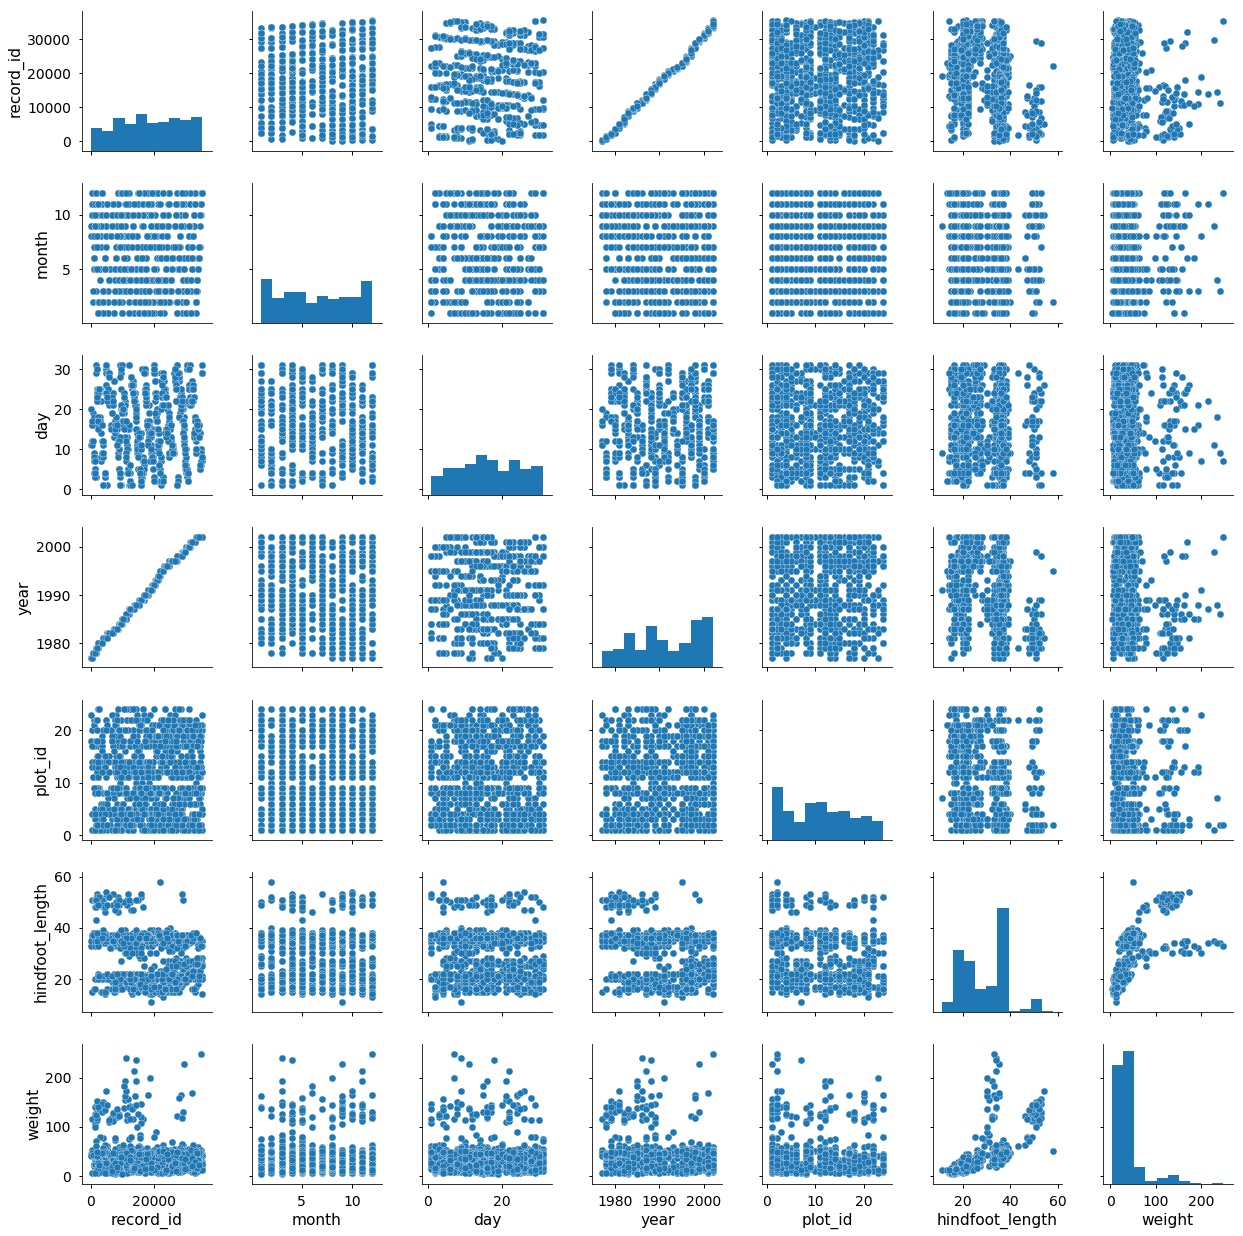

In [32]:
# Since this plot creates so many graphical elemments, the data set is subsampled to
# avoid waiting for the plot creation to finish. Setting `random_state` makes sure the 
# same observations are sampled each time this is run.
surveys_sample = surveys.dropna().sample(1000, random_state=0)
sns.pairplot(surveys_sample)

At first glance, the relationship between `record_id` and `year` might look interesting, but it is likely only due to incrementing the `record_id` as more animals are caught over time. Since most variables here are categorical, it would make sense to explore them with the same `factorplot()` as in the previous section. In the following analysis, the focus will be on the relationship between the continuous variables `weight` and `hindfoot_height`, which can be seen to have some clustering of groups of points in the scatter matrix above.

The corresponding function to `factorplot()` for two continuous variables is called `lmplot()` (for "linear model plot").

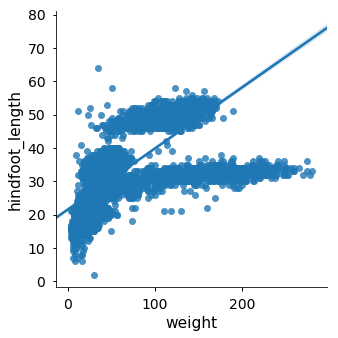

In [33]:
sns.lmplot(x='weight', y='hindfoot_length', data=surveys)

By default, it creates a scatter plot between the two variables and fits a regression line. The regression line can be removed for now.

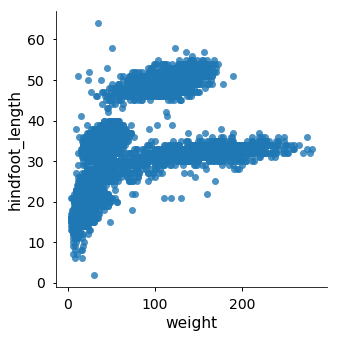

In [34]:
sns.lmplot(x='weight', y='hindfoot_length',
           data=surveys, fit_reg=False)

It looks like the graph is quite oversaturated and many data points are plotted on top of each other. Compare the number of distinct observations that are visible in the plot with the number in the data frame.

In [35]:
surveys.shape

(34786, 13)

There is no where near that many distinct observations visible in the plot, which means many data points are plotted on top of each other obfuscating what is beneath them. This problem can be ameliorated somewhat by adding transparency (the `alpha` parameter) and reducing the size of each point in the graph (the `s` parameter). More robust ways of dealing with saturated plots include two dimensional histograms such as `hexbin` plots, which will be covered in the next lecture.

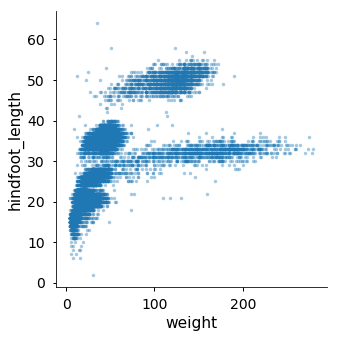

In [36]:
sns.lmplot(x='weight', y='hindfoot_length',
           data=surveys, fit_reg=False, 
           scatter_kws={'s': 12, 'alpha':0.4})

The scatter plot argument are passed as a dictionary here, instead of directly to parameters in the `lmplot()` function. This is a design decision taken in `seaborn` and helps for example to ensure there are no collisions among parameters (the scatter plot function that `seaborn` uses is from matplotlib and takes a lot of arguments, some of which would be inseparable from those for the regression line)

Based on the hindfoot lengths and the weights, there appears to be 4-5 clusters in this data. Potentially, one of the categorical variables in the data could explain this pattern, as previously. Coloring the data points according to a categorical variable is an easy way to find out if there seems to be correlation. Let's try this with `plot_type`.

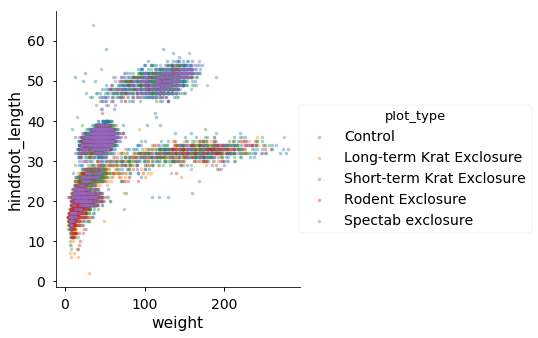

In [37]:
sns.lmplot(x='weight', y='hindfoot_length', hue='plot_type',
           data=surveys, fit_reg=False,
           scatter_kws={'s': 12, 'alpha':0.4})

It seems like the type of plot the animal was captured on correlates well with
some of these clusters, but there are still many that are quite mixed. Let's try
to do better! This time, the information about the data can provide some clues
to which variable to look at. The plot above suggests that there might be 4-5
clusters, so a variable with 4-5 values is a good guess for what could explain
the observed pattern in the scatter plot.

In [38]:
surveys.nunique()

record_id          34786
month                 12
day                   31
year                  26
plot_id               24
species_id            48
sex                    2
hindfoot_length       56
weight               255
genus                 26
species               40
taxa                   4
plot_type              5
dtype: int64

There are four taxa so that could be a good candidate, let's see which those are.

In [39]:
surveys['taxa'].unique()

array(['Rodent', 'Rabbit', 'Bird', 'Reptile'], dtype=object)

It seems reasonable that these taxa contain animals different enough to have
diverse weights and length of their feet. Lets use this categorical variable to
color the scatter plot.

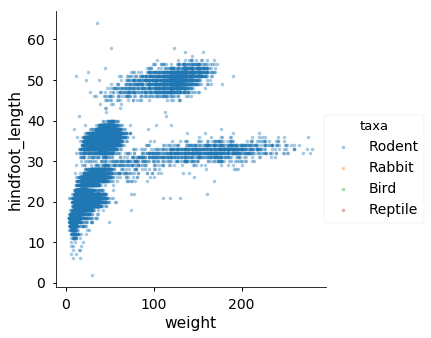

In [40]:
sns.lmplot(x='weight', y='hindfoot_length', hue='taxa',
           data=surveys, fit_reg=False,
           scatter_kws={'s': 12, 'alpha':0.4})

Only rodents? That was unexpected... Let's check what's going on.

In [41]:
surveys.groupby('taxa').size()

taxa
Bird         450
Rabbit        75
Reptile       14
Rodent     34247
dtype: int64

There is definitely mostly rodents in our data set...

In [42]:
surveys.dropna(subset=['hindfoot_length']).groupby('taxa').size()

taxa
Rodent    31438
dtype: int64

...and it turns out that only rodents, have had their hindfeet measured!

Let's remove all animals that did not have their hindfeet or weight measured, including those rodents that did not.

In [43]:
surveys_hf_wt = surveys.dropna(subset=['hindfoot_length', 'weight'])
surveys_hf_wt.nunique()

record_id          30738
month                 12
day                   31
year                  26
plot_id               24
species_id            24
sex                    2
hindfoot_length       55
weight               252
genus                  9
species               21
taxa                   1
plot_type              5
dtype: int64

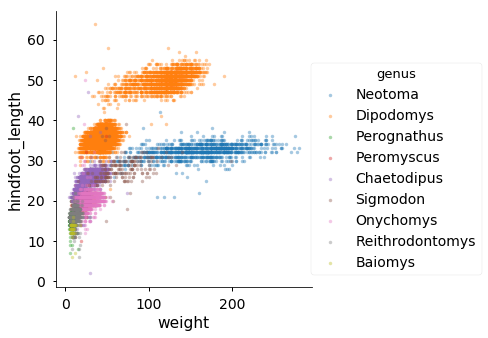

In [44]:
sns.lmplot(x='weight', y='hindfoot_length', hue='genus',
           data=surveys_hf_wt, fit_reg=False,
           scatter_kws={'s': 12, 'alpha':0.4})

The legend can be made more manageable, by manually specifying the number of columns and the fontsize to use.

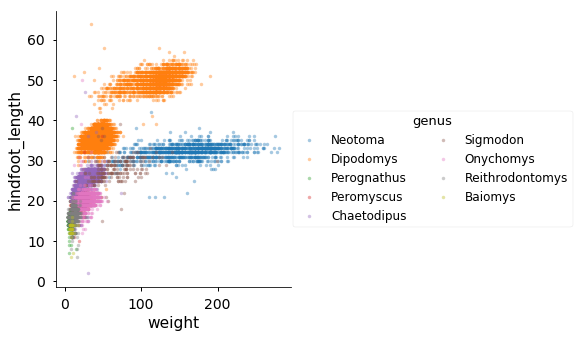

In [45]:
# g is the grid object returned from lmplot()
g = sns.lmplot(x='weight', y='hindfoot_length', hue='genus',
               data=surveys_hf_wt, fit_reg=False,
               scatter_kws={'s': 12, 'alpha':0.4}, legend=False)
g.add_legend(ncol=2, fontsize=12)

Great! There is a clear separation between different species, explaining much of the variance observed in the hindfoot length and weight measurements. It is still a bit messy as it appears there are around 5 clusters, but there are 9 genera in the legend. Let's see if all these genera actually have observations.

In [46]:
surveys_hf_wt.groupby('genus').size()

genus
Baiomys               45
Chaetodipus         5796
Dipodomys          14558
Neotoma             1046
Onychomys           2997
Perognathus         1502
Peromyscus          2074
Reithrodontomys     2512
Sigmodon             208
dtype: int64

It appears so. To ensure that no data points are obfuscated by others, the same syntax as with `factorplot()` can be used to facet the plot based on categorical variables.

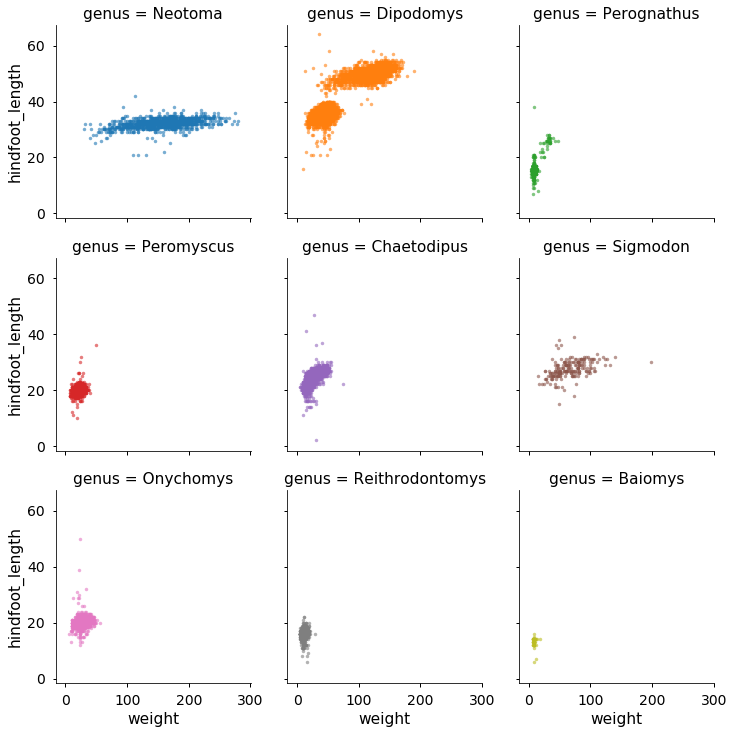

In [47]:
sns.lmplot(x='weight', y='hindfoot_length', hue='genus',
           col='genus', col_wrap=3, size=3.5, data=surveys_hf_wt,
           fit_reg=False, scatter_kws={'s': 12, 'alpha':0.6},)

In this plot it is easy to see the separation of each genus. In some of the subplots multiple clusters are still visible. Since `genus` is already used for the subplot faceting, the data points could be colored according to another variable in the data set, e.g. `species`, to find out what causes these clusters.

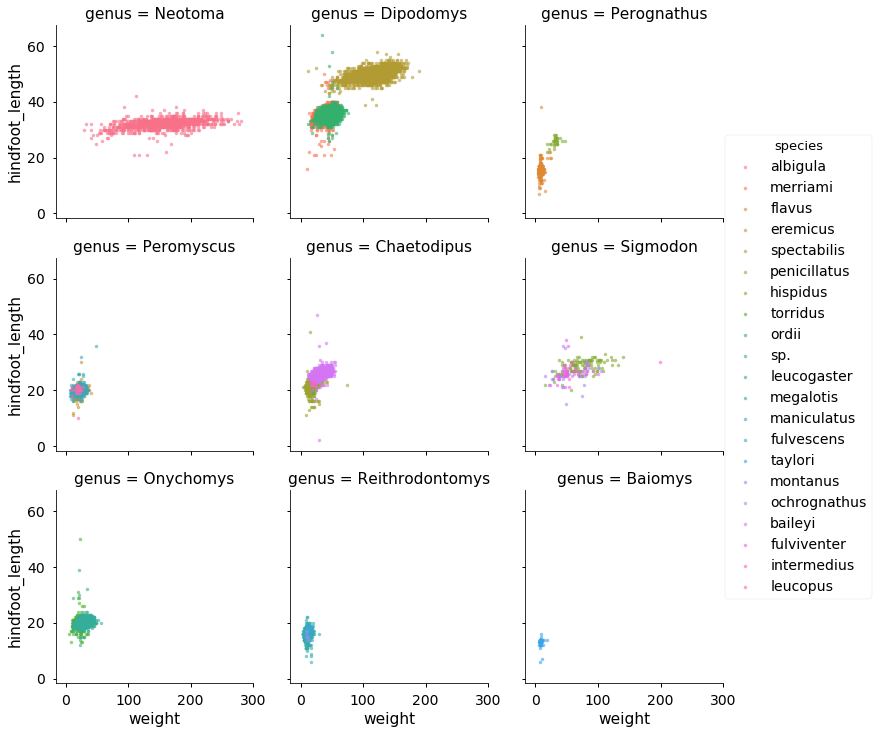

In [48]:
sns.lmplot(x='weight', y='hindfoot_length', hue='species',
           col='genus', col_wrap=3, size=3.5, data=surveys_hf_wt,
           fit_reg=False, scatter_kws={'s': 12, 'alpha':0.6})

This plot clearly shows where different species within the same genus differs in their weight and hindfeet length.

> #### Challenge 2
> 1. In the plot we just made, change the marker type for the data points from a circle to another matplotlib [marker of your choice from this list](https://matplotlib.org/api/markers_api.html). Read the `lmplot()` docstring to find out which parameter to use to change the marker.
> 2. Explore the impact of sexual dimorphism on the weight and hindfeet length within each species. Which variables did you chose for the faceting and coloring and why?

# Using any plotting function with `seaborn` grids

A major strength of the `seaborn` library is that it enables exploration of categorical variables through faceting, where the variables of interest are separated into the rows and columns of the plot grid as seen with `factorplot()` and `lmplot()`. These grids are very flexible and can be used with any plotting function, not just those that exist within `seaborn`.

The `seaborn` function `FacetGrid()` is the foundation for both `factorplot()` and `lmplot()`, and can be used directly with a custom plotting function. To understand how it works, one of the scatter plots made with `lmplot()` can be recreated using the `FacetGrid()` syntax. The first step is to setup the grid.

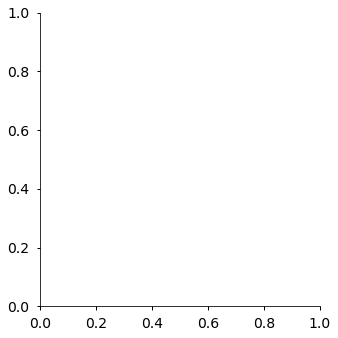

In [49]:
sns.FacetGrid(data=surveys_hf_wt, hue='species', size=5)
# `size` specifies the height of the figure and 5 is the 
# default value for this parameter in `lmplot()`

This empty grid is aware of which data frame will be plotted, but no graphical elements are added until a plotting function is mapped onto the grid. Let's add a scatter plot via the `matplotlib` function `scatter()`.

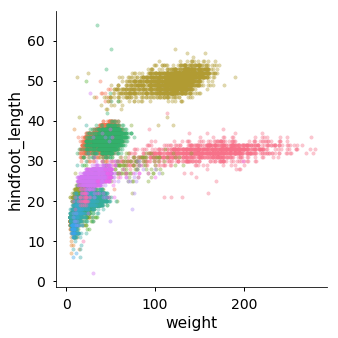

In [50]:
import matplotlib.pyplot as plt

g = sns.FacetGrid(data=surveys_hf_wt, hue='species', size=5)
g.map(plt.scatter, 'weight', 'hindfoot_length', s=12, alpha=0.4)

Next, a line plot will be used to visualize how the number of animals in each species and sex varies over time for the most abundant species. For this exercise, the `surveys_common` data set will be used. As a reminder, this data set was created in the beginning of the lecture and contains only the four most common species. The first step is to compute the number of observations per year for each species and each sex. 

In [51]:
surveys_common.groupby(['year', 'species', 'sex']).size()

year  species       sex
1977  merriami      F       75
                    M      106
      ordii         F       10
                    M        2
      penicillatus  F        3
1978  merriami      F      165
                    M      171
      ordii         F        5
                    M       16
      penicillatus  F       10
                    M       13
1979  merriami      F       83
                    M      100
      ordii         F       13
                    M       15
      penicillatus  F       13
                    M        6
1980  merriami      F      153
                    M      190
      ordii         F       29
                    M       34
      penicillatus  F       13
                    M        2
1981  merriami      F      173
                    M      221
      ordii         F       52
                    M       28
      penicillatus  F       11
                    M        6
1982  merriami      F      226
                          ... 
1999  merriami 

Looks good, create a data frame of the output, rename the size column and assign the resulting data frame to a new variable.

In [52]:
species_per_year = (
    surveys_common
     .groupby(['year', 'species', 'sex'])
     .size()
     .reset_index()
     .rename(columns={0: 'size'}) # Leave this out to see that the returned column has the name '0'
)
species_per_year.head()

,year,species,sex,size
0,1977,merriami,F,75
1,1977,merriami,M,106
2,1977,ordii,F,10
3,1977,ordii,M,2
4,1977,penicillatus,F,3


Longitudinal data such as the above is beneficially visualized as a line plot with years on the x-axis and the quantitative variable on the y-axis. Since there is no dedicated lineplot function in `seaborn`, `FacetGrid()` will be used with a the `matplotlib` function `plot()`.  (side note: the next version of `seaborn` (0.9) will have a dedicated function for relational scatter and line plots, but the `FacetGrid()` syntax is still very useful to know, and can be used with other plots such as heatmaps, histograms, and density plots.)

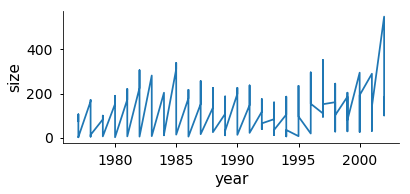

In [53]:
g = sns.FacetGrid(data=species_per_year, aspect=2) # `aspect` controls the width of the plot
g.map(plt.plot, 'year', 'size')

Unfortunately, this does not give the expected result because the species are plotted separately in each year, and the line connects all observations, even across species. `seaborn` needs to be instructed to draw separate lines for each species, which can be done by modifying the hue parameter.

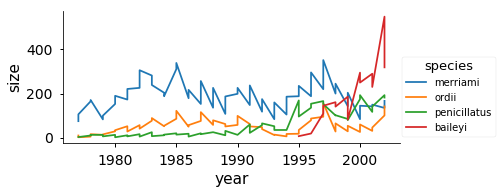

In [54]:
g = sns.FacetGrid(data=species_per_year, hue='species', aspect=2)
g.map(plt.plot, 'year', 'size')
g.add_legend(fontsize=10)

`FacetGrid()` can facet variables onto columns and rows just like `factorplot()` and `lmplot()`. Use this to make a time series plot for each species.

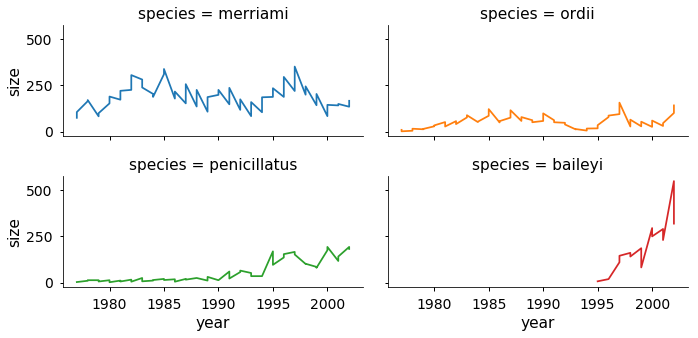

In [55]:
g = sns.FacetGrid(data=species_per_year, col='species', hue='species',
                  col_wrap=2, size=2.5, aspect=2)
g.map(plt.plot, 'year', 'size')

The line can be split line in each plot by the sex of each individual measured.

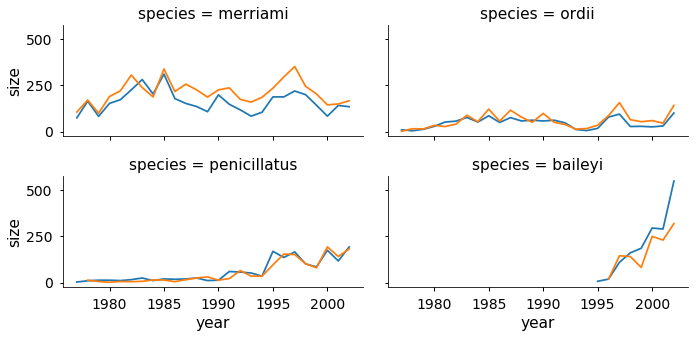

In [56]:
g = sns.FacetGrid(data=species_per_year, col='species', hue='sex',
                  col_wrap=2, size=2.5, aspect=2)
g.map(plt.plot, 'year', 'size')

Here it would be helpful to add a legend and clean up the subplot titles.

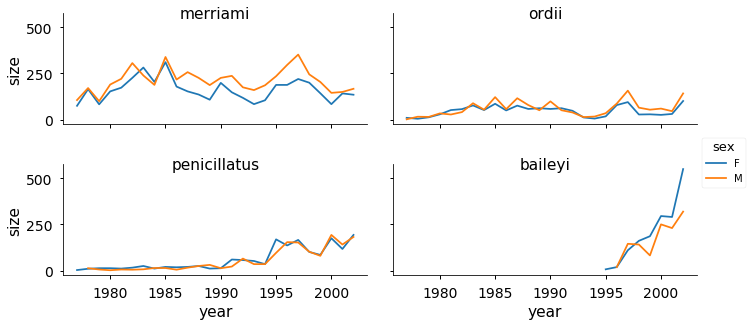

In [57]:
g = sns.FacetGrid(data=species_per_year, col='species', hue='sex',
                  col_wrap=2, size=2.5, aspect=2)
g.map(plt.plot, 'year', 'size')
g.add_legend(fontsize=10)
g.set_titles('{col_name}', y=0.9) #`y` adjusts the relative y-position of the title

>#### Challenge 3 (optional)
>
>1. Calculate the mean weight per year of all species together and plot it in a line plot.
>2. Calculate the mean weight per year for each species individually and plot it in a line plot with one facet per species.